CONTROLE DE INADIMPLÊNCIA EM OPERAÇÕES DE CRÉDITO

Uma fintech de Crédito iniciou sua operação de concessão de empréstimo pessoal e acompanhou a performance de pagamento de 1.000 clientes após 1 ano. Com base dessa amostra, pediu para a área de Análise de Dados verificar quais os fatores de risco dos clientes de forma a conseguir aprovar mais contratos com a menor inadimplência possível.

Com base nessas informações, pede-se:

Quais fatores de risco estão mais associados a inadimplência? Com isso, o que a fintech deveria mudar de forma a minimizar a inadimplência?

In [1]:
import pandas as pd

# Carregar as informações da planilha
df_base = pd.read_excel('C:/projeto/portifólio/projetos/inadimplência/Base_Inadimplencia.xlsx', sheet_name='Base')

print(df_base.head())


   Idade Sexo   Escolaridade Tipo_Moradia Saldo_Investimento  \
0     67    M      Graduacao      Propria   Sem investimento   
1     22    H      Graduacao      Propria              Pouco   
2     49    M  Pos Graduacao      Propria              Pouco   
3     45    M      Graduacao     De favor              Pouco   
4     53    M      Graduacao     De favor              Pouco   

  Saldo_Conta_Corrente  Valor_Emprestimo  Duracao_Emprestimo  Inadimplencia  
0                Pouco              1169                   6              0  
1             Moderado              5951                  48              1  
2            Sem conta              2096                  12              0  
3                Pouco              7882                  42              0  
4                Pouco              4870                  24              1  


1 - Esse trecho de código tem como objetivo visualizar as variáveis catgegóricas da base e sua distribuição.

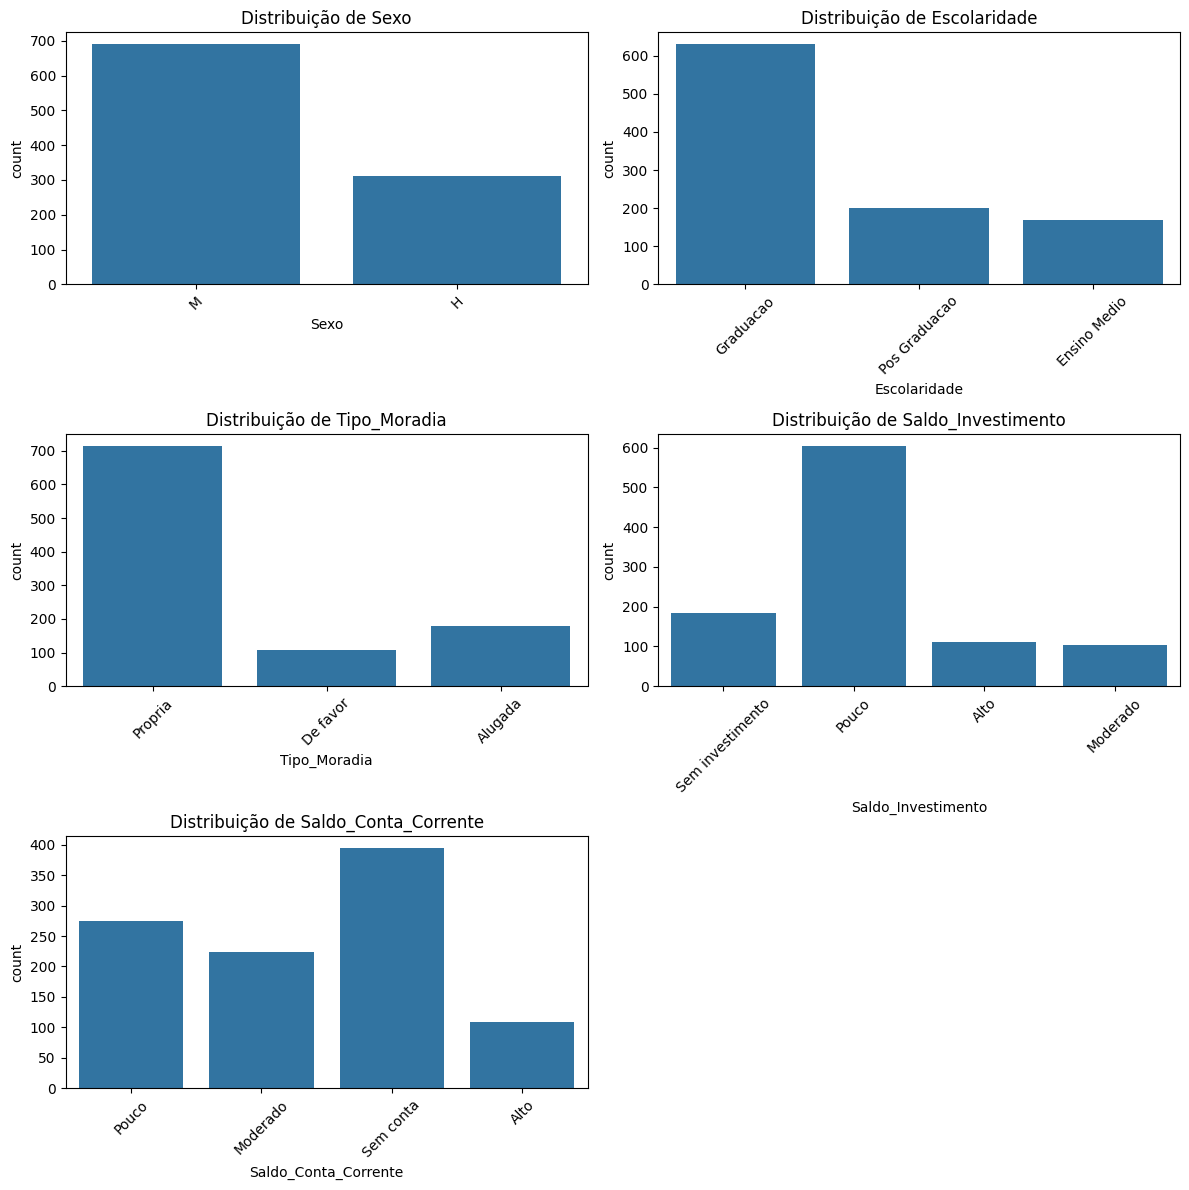

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cat_columns = df_base.select_dtypes(include="object").columns
num_cols = len(cat_columns)

cols = 2
rows = (num_cols // cols) + (num_cols % cols > 0)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 4 * rows))
axes = axes.flatten()  

for i, col in enumerate(cat_columns):
    sns.countplot(x=col, data=df_base, ax=axes[i])
    axes[i].set_title(f"Distribuição de {col}")
    axes[i].tick_params(axis='x', rotation=45) 

# Remover subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()


2 - A matriz de correlação mostra as relações entre variáveis numéricas no DataFrame. Primeiro, filtramos apenas as colunas quantitativas e, em seguida, geramos um heatmap para visualizar essas correlações. Isso ajuda a identificar padrões e associações entre as variáveis.

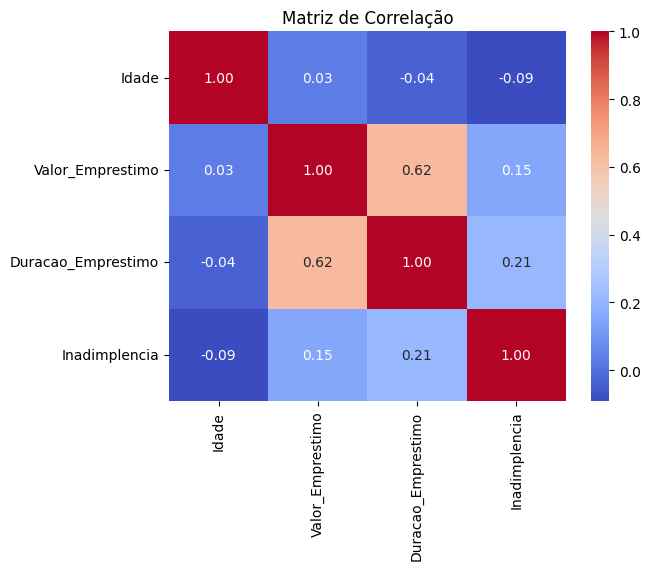

In [3]:
# Filtrando apenas colunas numéricas
df_corr = df_base.select_dtypes(include=['int64', 'float64'])  

sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Matriz de Correlação")
plt.show()



3 - Este código realiza a seleção de características utilizando a métrica de Informação Mútua. Os resultados são armazenados em um DataFrame e ordenados em ordem decrescente de valores de Informação Mútua, permitindo identificar as características mais relevantes na base.

In [4]:
from sklearn.feature_selection import mutual_info_classif

X = df_base.drop(columns=["Inadimplencia"])  
y = df_base["Inadimplencia"]  # Variável alvo

X_encoded = pd.get_dummies(X, drop_first=True)

# Calcular IV (usando Informação Mútua)
iv_values = mutual_info_classif(X_encoded, y)
iv_df = pd.DataFrame({"Variável": X_encoded.columns, "IV": iv_values})
print(iv_df.sort_values(by="IV", ascending=False))


                               Variável        IV
13       Saldo_Conta_Corrente_Sem conta  0.051635
7                  Tipo_Moradia_Propria  0.028502
11        Saldo_Conta_Corrente_Moderado  0.024704
9              Saldo_Investimento_Pouco  0.024559
0                                 Idade  0.023262
12           Saldo_Conta_Corrente_Pouco  0.022335
2                    Duracao_Emprestimo  0.018479
6                 Tipo_Moradia_De favor  0.016437
1                      Valor_Emprestimo  0.013930
5            Escolaridade_Pos Graduacao  0.006131
4                Escolaridade_Graduacao  0.000000
3                                Sexo_M  0.000000
8           Saldo_Investimento_Moderado  0.000000
10  Saldo_Investimento_Sem investimento  0.000000


4 - O código gera um boxplot para visualizar a distribuição dos valores dos empréstimos em relação à inadimplência. Isso permite identificar possíveis padrões ou relações entre o valor do empréstimo e a taxa de inadimplência, facilitando a análise de como o valor do empréstimo pode influenciar a probabilidade de inadimplência.

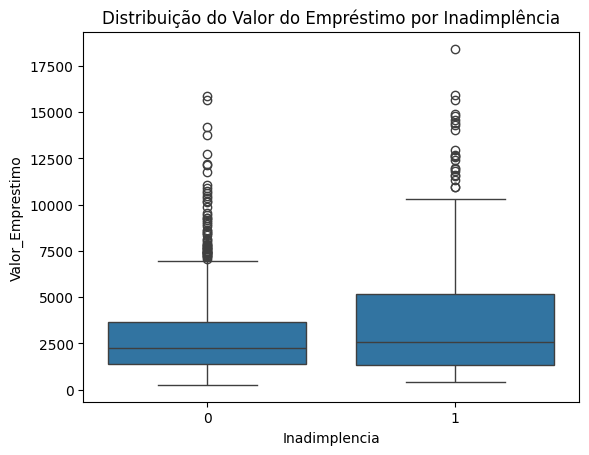

In [5]:
sns.boxplot(x="Inadimplencia", y="Valor_Emprestimo", data=df_base)
plt.title("Distribuição do Valor do Empréstimo por Inadimplência")
plt.show()


5 - Cria gráficos para visualizar a distribuição de variáveis categóricas em relação à variável "Inadimplência". As variáveis analisadas incluem sexo, escolaridade, tipo de moradia, saldo do investimento e saldo da conta corrente. Esses gráficos ajudam a entender como diferentes categorias se distribuem entre os inadimplentes e os não inadimplentes, fornecendo insights sobre possíveis fatores relacionados à inadimplência.

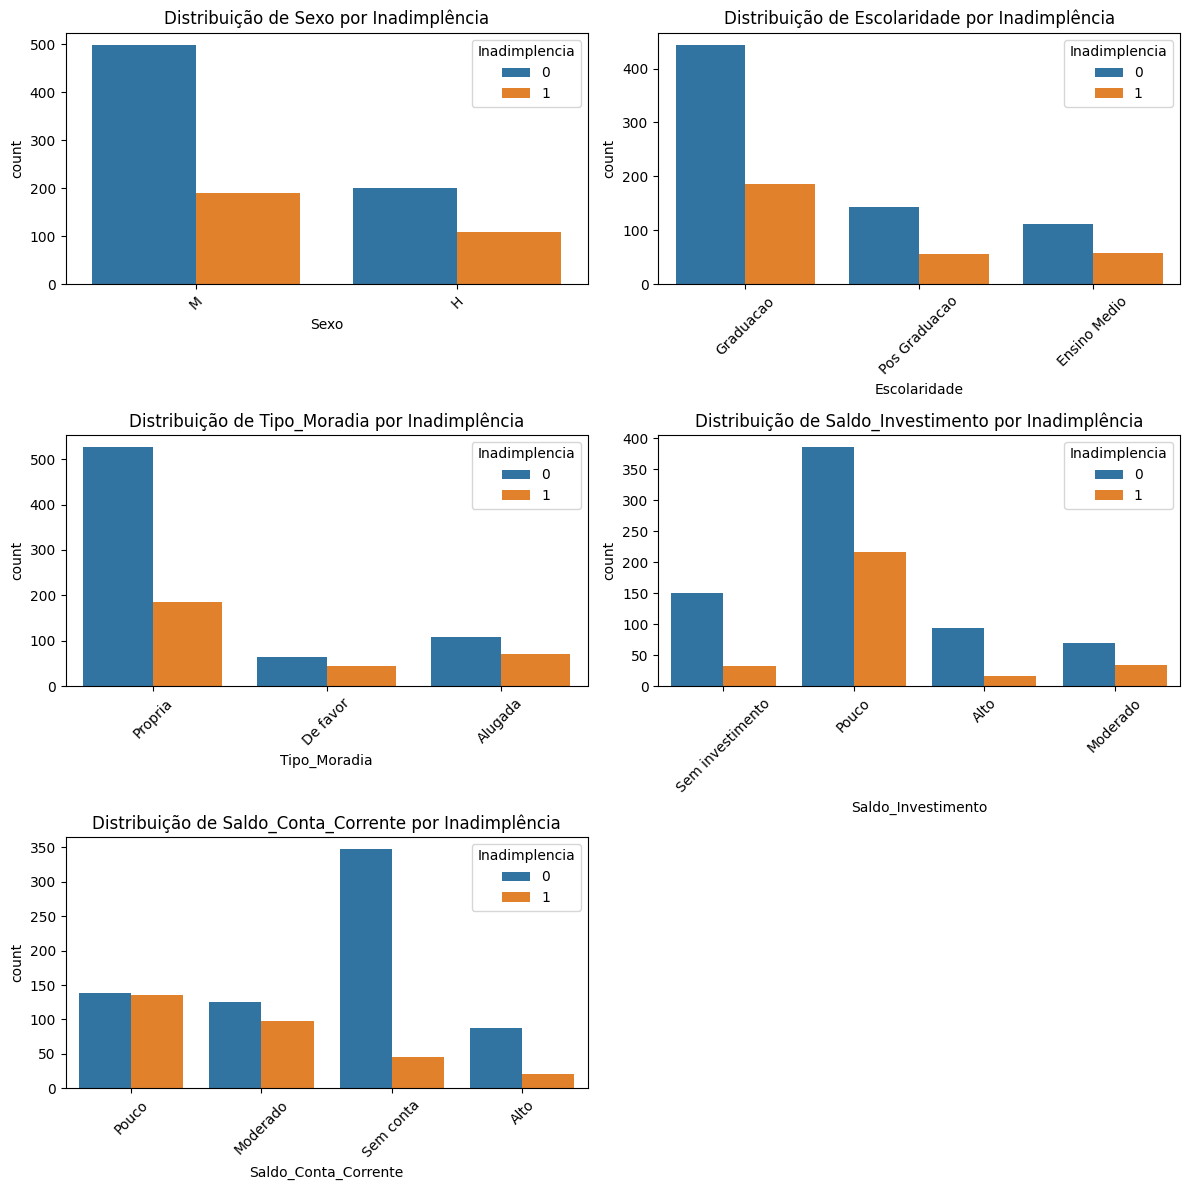

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_columns = [col for col in df_base.select_dtypes(include="object").columns if col != "Inadimplencia"]
num_cols = len(cat_columns)


cols = 2
rows = (num_cols // cols) + (num_cols % cols > 0)


fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(x=col, hue="Inadimplencia", data=df_base, ax=axes[i])
    axes[i].set_title(f"Distribuição de {col} por Inadimplência")
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()


6 - O código gera gráficos de densidade (KDE plots) para visualizar a distribuição das variáveis "Duração do Empréstimo" e "Valor do Empréstimo" em relação à variável "Inadimplência".

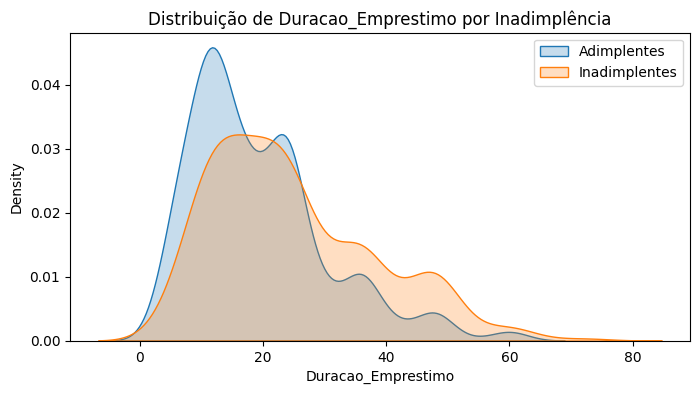

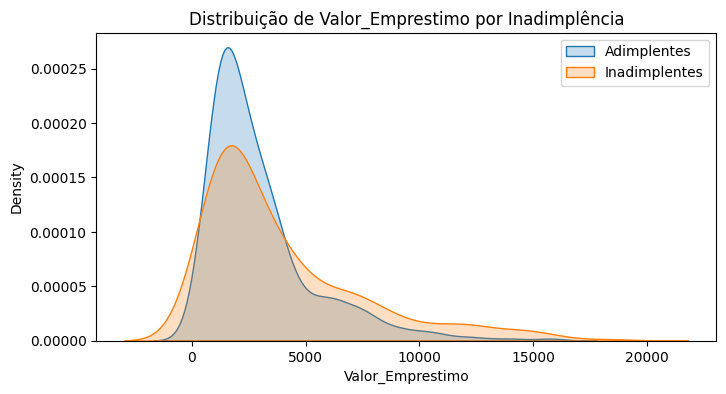

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

variaveis_relevantes = [
    "Duracao_Emprestimo",
    "Valor_Emprestimo"
]

for var in variaveis_relevantes:
    if var in df_base.columns:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df_base[df_base["Inadimplencia"] == 0][var], label="Adimplentes", fill=True)
        sns.kdeplot(df_base[df_base["Inadimplencia"] == 1][var], label="Inadimplentes", fill=True)
        plt.title(f"Distribuição de {var} por Inadimplência")
        plt.legend()
        plt.show()
    else:
        print(f"A coluna '{var}' não existe no DataFrame.")


7 - Este código define um critério de corte para aprovar ou reprovar com base na probabilidade de inadimplência e cria uma nova coluna no DataFrame `df_base` para indicar a aprovação. (Pode servir como parâmetro de aprovação para futuros clientes)

In [8]:
# Definir o corte (por exemplo, 0.4 para aprovação)
corte = 0.4

df_base['Aprovado'] = df_base['Inadimplencia'] < corte

num_aprovados = df_base['Aprovado'].sum()
num_reprovados = df_base.shape[0] - num_aprovados

print(f"Número de aprovados: {num_aprovados}")
print(f"Número de reprovados: {num_reprovados}")

print(df_base[['Inadimplencia', 'Aprovado']].head())


Número de aprovados: 700
Número de reprovados: 300
   Inadimplencia  Aprovado
0              0      True
1              1     False
2              0      True
3              0      True
4              1     False


Para minimizar a inadimplência, a fintech pode considerar as seguintes ações com base nas análises geradas:

1 - Ajustar o Critério de Corte: Revisar e ajustar o valor de corte (corte) para a probabilidade de inadimplência. Um corte mais rigoroso pode reduzir a aprovação de clientes com maior risco de inadimplência.

2 - Análise de Variáveis Relevantes: Focar nas variáveis que mostraram maior relevância na previsão de inadimplência, como "Duracao_Emprestimo" e "Valor_Emprestimo". Implementar políticas mais restritivas para clientes com características associadas a maior risco.

3 - Segmentação de Clientes: Segmentar os clientes com base em suas características e probabilidades de inadimplência. Oferecer produtos financeiros diferenciados para cada segmento, ajustando taxas de juros e condições de pagamento.

4 - Educação Financeira: Implementar programas de educação financeira para ajudar os clientes a gerenciar melhor suas finanças e reduzir o risco de inadimplência.

5 - Monitoramento Contínuo: Monitorar continuamente os clientes aprovados para identificar sinais precoces de inadimplência e intervir proativamente.


6 - Revisão de Políticas de Crédito: Revisar e atualizar as políticas de crédito regularmente com base nas análises de dados e tendências de inadimplência.

7 - Uso de Modelos Preditivos: Utilizar modelos preditivos mais avançados e técnicas de machine learning para melhorar a precisão na previsão de inadimplência.

Implementando essas ações, a fintech pode melhorar a gestão de risco e reduzir a taxa de inadimplência entre seus clientes.

Conclusão:

Com base nas análises geradas, a fintech pode adotar várias estratégias para minimizar a inadimplência. Ajustar o critério de corte para a probabilidade de inadimplência, focar nas variáveis mais relevantes, segmentar clientes, implementar programas de educação financeira, monitorar continuamente os clientes, revisar políticas de crédito e utilizar modelos preditivos avançados são algumas das ações recomendadas. Essas medidas ajudarão a fintech a gerenciar melhor o risco de crédito, aprovar clientes mais confiáveis e, consequentemente, reduzir a taxa de inadimplência.